IMPORTING THE NECESSARY MODULES

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

READING THE DATASET

In [2]:
dataset = pd.read_csv(r"/Users/kandy/Downloads/Black Friday train.zip")

In [3]:
dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
dataset.shape

(550068, 12)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


DESCRIBING THE DATASET

In [6]:
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
dataset.describe(include = 'object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


FEATURE ENGINEERING

In [8]:
dataset.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [9]:
(dataset['Product_Category_2'].isnull().sum()/len(dataset['Product_Category_2']))*100

31.56664266963357

In [10]:
(dataset['Product_Category_3'].isnull().sum()/len(dataset['Product_Category_3']))*100

69.67265865311198

In [11]:
#handling missing values

In [12]:
Product_Category_2 = dataset["Product_Category_2"].mean()

In [13]:
Product_Category_3 = dataset["Product_Category_3"].mean()

In [14]:
dataset["Product_Category_2"] = dataset['Product_Category_2'].fillna(Product_Category_2)

In [15]:
dataset["Product_Category_3"] = dataset['Product_Category_3'].fillna(Product_Category_3)

In [16]:
dataset.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [17]:
dataset["Stay_In_Current_City_Years"].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [18]:
dataset["Stay_In_Current_City_Years"] = dataset["Stay_In_Current_City_Years"].str.strip("+")

In [19]:
dataset["Stay_In_Current_City_Years"].value_counts()

1    193821
2    101838
3     95285
4     84726
0     74398
Name: Stay_In_Current_City_Years, dtype: int64

In [20]:
dataset.dtypes


User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [21]:
dataset["Stay_In_Current_City_Years"] = dataset["Stay_In_Current_City_Years"].astype(int)

In [22]:
dataset.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [23]:
dataset["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

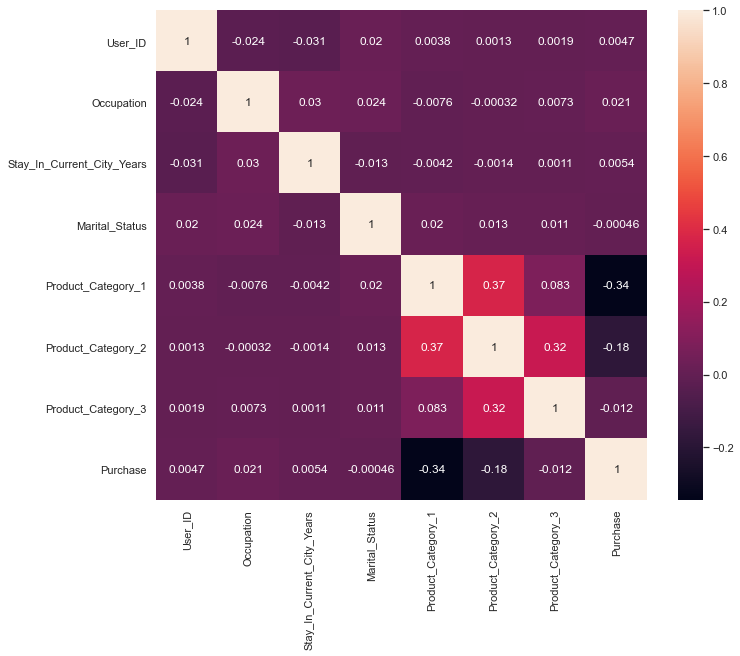

In [24]:
plt.subplots(figsize=(11, 9))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

The graph above is a heatmap showing how the dataset are correlated with each other.

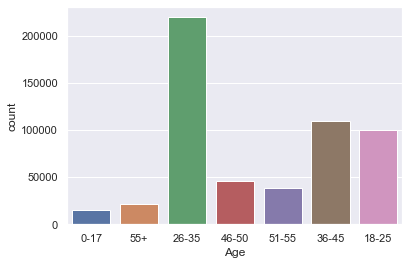

In [25]:
sns.countplot(data=dataset, x='Age')
plt.show()

OBSERVATION:
    From the graph above, you can see that we have more people within the age bracket of 26-35 participated in the black friday
    sales

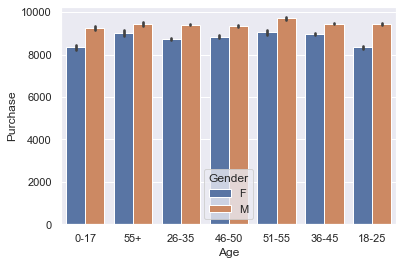

In [26]:
sns.barplot(data=dataset,x='Age', y='Purchase',hue='Gender')
plt.show()

OBSERVATION:
    It was observed that people within the age bracket of 51-55 and also male has purchased more during the black friday sales.

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

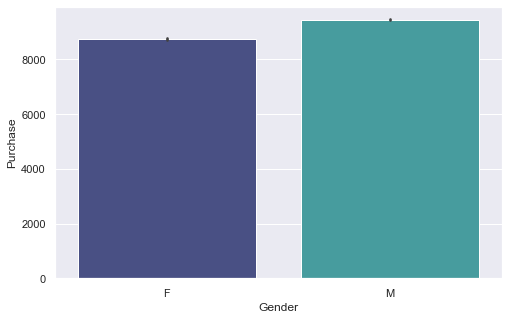

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x='Gender',y='Purchase',data=dataset,palette='mako')

OBSERVATION:
    It was observed that the male gender purchased more during the black friday sales as compared tho the female

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

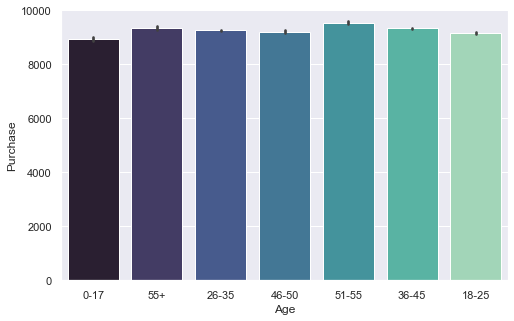

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(x='Age', y='Purchase',data=dataset,palette='mako')

OBSERVATION:
    It was observed here that people within the age bracket of 51-55, purchased more during the black friday sales.meaning older
    people purchased more.

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

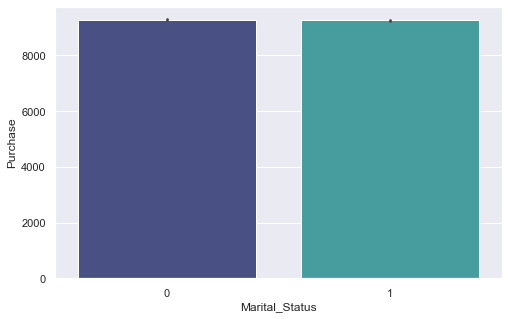

In [29]:
plt.figure(figsize=(8,5))
sns.barplot(x='Marital_Status', y='Purchase',data=dataset,palette='mako')

OBSERVATION:
    It is observed that both single which represent 0 and married which represent 1 has thesame purchasing power.

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='Purchase'>

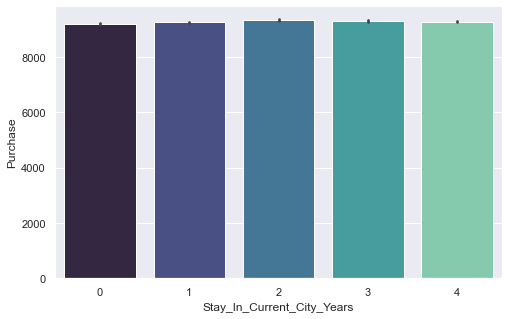

In [30]:
plt.figure(figsize=(8,5))
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase',data=dataset,palette='mako')

observation:
    The number of years one stays in current city does not really affect the purchasing power since the graph shows almost
    thesame thing for years stayed in current city as compared with purchase.

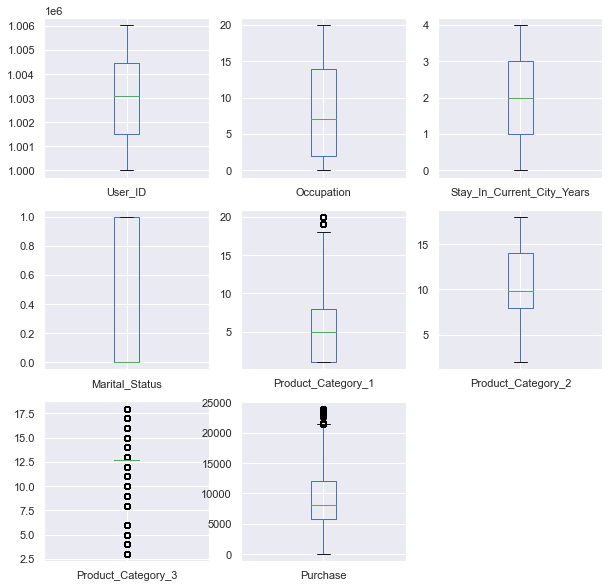

In [31]:
dataset.plot(kind='box', subplots=True, layout=(3,3), figsize=(10,10))
plt.show()

**OBSERVATION**:You can see that product category3 has alot of outliers and product category1 has just few outliers.purchase has 
    outliers but we will not touch it

In [32]:
dataset["Age"].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [33]:
### Categorical Binning
Age_group = []
for i in dataset['Age']:
    if i in ["0-17"]:
        Age_group.append('Teanager')
    elif i in ["18-25","26-35"]:
        Age_group.append('Adult')
    elif i in ["36-45","46-50"]:
        Age_group.append('matured')
    elif i in ["51-55","55+"]:
        Age_group.append('Elderly')
    else :
        Age_group.append('Others')
dataset['Age_groups'] = Age_group
dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_groups
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.842329,12.668243,8370,Teanager
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.000000,14.000000,15200,Teanager
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.842329,12.668243,1422,Teanager
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.000000,12.668243,1057,Teanager
4,1000002,P00285442,M,55+,16,C,4,0,8,9.842329,12.668243,7969,Elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,9.842329,12.668243,368,Elderly
550064,1006035,P00375436,F,26-35,1,C,3,0,20,9.842329,12.668243,371,Adult
550065,1006036,P00375436,F,26-35,15,B,4,1,20,9.842329,12.668243,137,Adult
550066,1006038,P00375436,F,55+,1,C,2,0,20,9.842329,12.668243,365,Elderly


In [34]:
dataset.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
Age_groups                    0
dtype: int64

In [35]:
dataset["Age_groups"].value_counts()

Adult       319247
matured     155714
Elderly      60005
Teanager     15102
Name: Age_groups, dtype: int64

In [36]:
dataset.drop(columns=["Age", "User_ID", "Product_ID"], axis = 1, inplace= True)

In [37]:
dataset

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_groups
0,F,10,A,2,0,3,9.842329,12.668243,8370,Teanager
1,F,10,A,2,0,1,6.000000,14.000000,15200,Teanager
2,F,10,A,2,0,12,9.842329,12.668243,1422,Teanager
3,F,10,A,2,0,12,14.000000,12.668243,1057,Teanager
4,M,16,C,4,0,8,9.842329,12.668243,7969,Elderly
...,...,...,...,...,...,...,...,...,...,...
550063,M,13,B,1,1,20,9.842329,12.668243,368,Elderly
550064,F,1,C,3,0,20,9.842329,12.668243,371,Adult
550065,F,15,B,4,1,20,9.842329,12.668243,137,Adult
550066,F,1,C,2,0,20,9.842329,12.668243,365,Elderly


In [38]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [39]:
var_mod= ["Gender", "City_Category", "Age_groups"]
lab_enc = LabelEncoder()
for i in var_mod:
    dataset[i] = lab_enc.fit_transform(dataset[i])

In [40]:
dataset

,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_groups
0,0,10,0,2,0,3,9.842329,12.668243,8370,2
1,0,10,0,2,0,1,6.000000,14.000000,15200,2
2,0,10,0,2,0,12,9.842329,12.668243,1422,2
3,0,10,0,2,0,12,14.000000,12.668243,1057,2
4,1,16,2,4,0,8,9.842329,12.668243,7969,1
...,...,...,...,...,...,...,...,...,...,...
550063,1,13,1,1,1,20,9.842329,12.668243,368,1
550064,0,1,2,3,0,20,9.842329,12.668243,371,0
550065,0,15,1,4,1,20,9.842329,12.668243,137,0
550066,0,1,2,2,0,20,9.842329,12.668243,365,1


In [41]:
tita2 =pd.concat([dataset,pd.get_dummies(dataset["Gender"], prefix = "gender")],axis = 1)
tita2.drop(["Gender"], axis = 1, inplace = True)                                                             
tita3 = pd.concat([tita2,pd.get_dummies(tita2['City_Category'], prefix='City_Category')],axis=1)
tita3.drop(['City_Category'],axis=1, inplace=True)
tita5 = pd.concat([tita3,pd.get_dummies(tita3['Age_groups'], prefix='Age')],axis=1)
tita5.drop(['Age_groups'],axis=1, inplace=True)


In [42]:
tita5

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,gender_0,gender_1,City_Category_0,City_Category_1,City_Category_2,Age_0,Age_1,Age_2,Age_3
0,10,2,0,3,9.842329,12.668243,8370,1,0,1,0,0,0,0,1,0
1,10,2,0,1,6.000000,14.000000,15200,1,0,1,0,0,0,0,1,0
2,10,2,0,12,9.842329,12.668243,1422,1,0,1,0,0,0,0,1,0
3,10,2,0,12,14.000000,12.668243,1057,1,0,1,0,0,0,0,1,0
4,16,4,0,8,9.842329,12.668243,7969,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,13,1,1,20,9.842329,12.668243,368,0,1,0,1,0,0,1,0,0
550064,1,3,0,20,9.842329,12.668243,371,1,0,0,0,1,1,0,0,0
550065,15,4,1,20,9.842329,12.668243,137,1,0,0,1,0,1,0,0,0
550066,1,2,0,20,9.842329,12.668243,365,1,0,0,0,1,0,1,0,0


In [43]:
X=tita5.loc[:, tita5.columns != 'Purchase']
y=tita5['Purchase']

In [44]:
sc_X = StandardScaler()
scaled_X = sc_X.fit_transform(X)

In [45]:
scaled_X

array([[ 0.29486356,  0.10980142, -0.83301799, ..., -0.34991919,
         5.95176613, -0.62837761],
       [ 0.29486356,  0.10980142, -0.83301799, ..., -0.34991919,
         5.95176613, -0.62837761],
       [ 0.29486356,  0.10980142, -0.83301799, ..., -0.34991919,
         5.95176613, -0.62837761],
       ...,
       [ 1.06142262,  1.66086068,  1.20045427, ..., -0.34991919,
        -0.16801735, -0.62837761],
       [-1.08494277,  0.10980142, -0.83301799, ...,  2.85780267,
        -0.16801735, -0.62837761],
       [-1.23825458,  1.66086068,  1.20045427, ..., -0.34991919,
        -0.16801735,  1.59139978]])

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.25, random_state = 42)

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression()

In [50]:
model.fit(X_train,y_train)

LinearRegression()

In [51]:
y_pred = model.predict(X_test)

In [52]:
y_pred

array([12947.5503733, 10504.0503733,  7110.9253733, ...,  9296.5503733,
        7581.5503733, 10132.3003733])

In [53]:
from sklearn.metrics import mean_absolute_error

In [54]:
mae =mean_absolute_error(y_test, y_pred) 

In [55]:
mae

3587.609893557437

In [56]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
R2

0.1278515479640101

In [57]:
from sklearn import metrics

In [58]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3587.609893557437
Mean Squared Error: 21938067.973874312
Root Mean Squared Error: 4683.809130811621


In [59]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state =42)

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rfr = RandomForestRegressor()

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
scores= cross_val_score(rfr, X_train, y_train, cv=5,scoring = "neg_mean_absolute_error")

In [64]:
scores, scores.mean()

(array([-2260.74818643, -2242.99687718, -2246.00330237, -2264.01774479,
        -2257.96427034]),
 -2254.3460762204863)

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = {
    "n_estimators":[100,200],
    "max_depth": range(3,6),
    "min_samples_split": range(2,4)
}

In [67]:
grid_search =GridSearchCV(RandomForestRegressor(), param_grid, scoring="neg_mean_absolute_error", cv=5)

In [68]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(3, 6),
                         'min_samples_split': range(2, 4),
                         'n_estimators': [100, 200]},
             scoring='neg_mean_absolute_error')

In [69]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 100}

In [70]:
final_model = grid_search.best_estimator_

In [71]:
final_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, min_samples_split=3)

In [72]:
predictions= final_model.predict(X_test)

In [73]:
mean_absolute_error(y_test, predictions)

2409.283966795007

In [74]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Absolute Error: 2409.283966795007
Mean Squared Error: 10705872.938320434
Root Mean Squared Error: 3271.9830284279337


**CONCLUSION**:The mean absolute error which was initially 3587 was reduced to 2409 after carrying out hyper parameter tuning
    using grid search and root mean squared error which was 4683 was reduced to 3271 after hyper parameter tuning.